In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Nadam, Adamax, Adagrad, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint



In [19]:
import os
base_dir ="C:/Users/chundie/Desktop/OriginalDataset"
img_size = (224, 224)

In [20]:
x=[]
y=[]

In [21]:
from tensorflow.keras.utils import load_img, img_to_array
for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                # Chargement de l'image et redimensionnement
                img = load_img(file_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0  # Normalisation
                x.append(img_array)
                y.append(label)  # Nom du dossier = classe
            except Exception as e:
                print(f"Erreur avec {file_path} : {e}")

In [22]:
# Conversion en numpy array
x = np.array(x, dtype="float32")
y = np.array(y)

In [23]:
# Encodage des labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [24]:
x.shape

(6400, 224, 224, 3)

In [25]:
y.shape

(6400,)

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=42)


In [27]:
x_train=x_train[:1000]
y_train=y_train[:1000]
x_train=x_train.astype('float32')
x_train = tf.image.resize(x_train, [224, 224]).numpy()

In [28]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

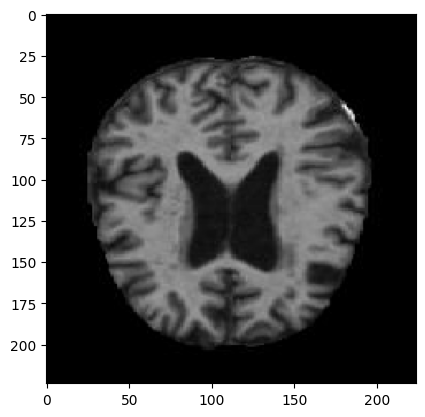

In [29]:
import matplotlib.pyplot as plt
for i in range(0,3):
    plt.imshow(x_test[i],cmap='grey')
    plt.show

In [30]:
x_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)


(1000, 224, 224, 1, 3)
(960, 224, 224, 1, 3)
(1000,)


In [32]:
# Normalisation:
train_images = x_train.astype("float32") / 255
test_images = x_test.astype("float32") / 255


In [33]:
x_train=np.squeeze(x_train)
x_test=np.squeeze(x_test)
print(x_train.shape)
print(x_test.shape)

(1000, 224, 224, 3)
(960, 224, 224, 3)


In [34]:
from tensorflow.keras.regularizers import l1,l2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.applications import VGG16,ResNet50,InceptionV3,Xception,VGG19
from keras import layers
from keras.applications import ResNet50

base_model =VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 4. Geler les couches convolutionnelles
for layer in base_model.layers:
    layer.trainable = False

# 5. Ajouter le classifieur personnalisé



model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(300, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     7,526,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,915,294 (106.49 MB)

 Trainable params: 7,890,910 (30.10 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [35]:
sgd = tf.keras.optimizers.SGD(0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
nadam = tf.keras.optimizers.Nadam()
adamax = tf.keras.optimizers.Adamax()
adagrad = tf.keras.optimizers.Adagrad()
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


In [36]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [37]:
model.compile(
    optimizer=adam,
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [39]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [40]:
print(type(y_train))
print(y_train.dtype)
print(y_train[:5])

<class 'numpy.ndarray'>
int64
[3 3 2 2 2]


In [41]:
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(224, 224, 3)


In [42]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=10, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss',patience=20, restore_best_weights=True)

checkpoint_path = 'C:/Users/chundie/Desktop/pfa fatima/best_model.h5'

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)

history = model.fit(x_train, y_train, epochs=60,batch_size=100, validation_split=0.2,callbacks=[reduce_lr,early_stopping, checkpoint])

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3397 - loss: 2.1607
Epoch 1: val_accuracy improved from None to 0.37500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 7s/step - accuracy: 0.3762 - loss: 1.8208 - val_accuracy: 0.3750 - val_loss: 1.4278 - learning_rate: 0.0010
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4045 - loss: 1.3053
Epoch 2: val_accuracy improved from 0.37500 to 0.47000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.4313 - loss: 1.2389 - val_accuracy: 0.4700 - val_loss: 1.1849 - learning_rate: 0.0010
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4539 - loss: 1.1249
Epoch 3: val_accuracy did not improve from 0.47000
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step - accuracy: 0.4275 - loss: 1.1398 - val_accuracy: 0.3850 - val_loss: 1.2112 - learning_rate: 0.0010
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4659 - loss: 1.0884
Epoch 4: val_accuracy did not improve from 0.47000
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step - accuracy: 0.4863 - loss: 1.0936 - val_accuracy: 0.3750 - val_loss: 1.1219 - learning_rate: 0.0010
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4795 - loss: 1.0949
Epoch 5: val_accuracy improved from 0.47000 to 0.48000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.4588 - loss: 1.0852 - val_accuracy: 0.4800 - val_loss: 1.1029 - learning_rate: 0.0010
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4513 - loss: 1.0902
Epoch 6: val_accuracy did not improve from 0.48000
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step - accuracy: 0.4712 - loss: 1.0754 - val_accuracy: 0.4700 - val_loss: 1.1121 - learning_rate: 0.0010
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4915 - loss: 1.0750
Epoch 7: val_accuracy did not improve from 0.48000
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step - accuracy: 0.4850 - loss: 1.0804 - val_accuracy: 0.4700 - val_loss: 1.1630 - learning_rate: 0.0010
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4736 - loss: 1.0611
Epoch 8: val_accuracy did not improve from 0.48000
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.4737 - loss: 1.0583 - val_accuracy: 0.4700 - val_loss: 1.0693 - learning_rate: 0.0010
Epoch 9/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accurac

8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.5525 - loss: 0.9136 - val_accuracy: 0.4950 - val_loss: 0.9746 - learning_rate: 0.0010
Epoch 18/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5682 - loss: 0.9026
Epoch 18: val_accuracy improved from 0.49500 to 0.50000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.5725 - loss: 0.9127 - val_accuracy: 0.5000 - val_loss: 0.9720 - learning_rate: 0.0010
Epoch 19/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5679 - loss: 0.8791
Epoch 19: val_accuracy did not improve from 0.50000
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 8s/step - accuracy: 0.5650 - loss: 0.8955 - val_accuracy: 0.5000 - val_loss: 0.9710 - learning_rate: 0.0010
Epoch 20/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5393 - loss: 0.9253
Epoch 20: val_accuracy improved from 0.50000 to 0.51000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 8s/step - accuracy: 0.5612 - loss: 0.8957 - val_accuracy: 0.5100 - val_loss: 0.9595 - learning_rate: 0.0010
Epoch 21/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5762 - loss: 0.9168
Epoch 21: val_accuracy did not improve from 0.51000
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 8s/step - accuracy: 0.5938 - loss: 0.8945 - val_accuracy: 0.5000 - val_loss: 0.9697 - learning_rate: 0.0010
Epoch 22/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5918 - loss: 0.8606
Epoch 22: val_accuracy did not improve from 0.51000
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step - accuracy: 0.6075 - loss: 0.8574 - val_accuracy: 0.4950 - val_loss: 1.0333 - learning_rate: 0.0010
Epoch 23/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6071 - loss: 0.8289
Epoch 23: val_accuracy improved from 0.51000 to 0.55500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step - accuracy: 0.6263 - loss: 0.8030 - val_accuracy: 0.5550 - val_loss: 1.0006 - learning_rate: 0.0010
Epoch 24/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6318 - loss: 0.7849
Epoch 24: val_accuracy did not improve from 0.55500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6100 - loss: 0.8171 - val_accuracy: 0.5550 - val_loss: 0.9327 - learning_rate: 0.0010
Epoch 25/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6388 - loss: 0.7868
Epoch 25: val_accuracy did not improve from 0.55500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6438 - loss: 0.7707 - val_accuracy: 0.5250 - val_loss: 0.9683 - learning_rate: 0.0010
Epoch 26/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6602 - loss: 0.7050
Epoch 26: val_accuracy improved from 0.55500 to 0.56000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6413 - loss: 0.7344 - val_accuracy: 0.5600 - val_loss: 0.9395 - learning_rate: 0.0010
Epoch 27/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6853 - loss: 0.7176
Epoch 27: val_accuracy did not improve from 0.56000
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6575 - loss: 0.7353 - val_accuracy: 0.5500 - val_loss: 1.0536 - learning_rate: 0.0010
Epoch 28/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6370 - loss: 0.7840
Epoch 28: val_accuracy improved from 0.56000 to 0.56500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6525 - loss: 0.7764 - val_accuracy: 0.5650 - val_loss: 0.9505 - learning_rate: 0.0010
Epoch 29/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5998 - loss: 0.7989
Epoch 29: val_accuracy did not improve from 0.56500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6187 - loss: 0.7798 - val_accuracy: 0.5450 - val_loss: 0.9228 - learning_rate: 0.0010
Epoch 30/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6494 - loss: 0.7452
Epoch 30: val_accuracy did not improve from 0.56500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6538 - loss: 0.7486 - val_accuracy: 0.5400 - val_loss: 1.0824 - learning_rate: 0.0010
Epoch 31/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6655 - loss: 0.7232
Epoch 31: val_accuracy did not improve from 0.56500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6662 - loss: 0.7303 - val_accuracy: 0.5650 - val_loss: 0.9891 - learning_rate: 0.0010
Epoch 32/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - 

8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6737 - loss: 0.7394 - val_accuracy: 0.5850 - val_loss: 0.9674 - learning_rate: 0.0010
Epoch 35/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6133 - loss: 0.7922
Epoch 35: val_accuracy did not improve from 0.58500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.6237 - loss: 0.7984 - val_accuracy: 0.5550 - val_loss: 0.9184 - learning_rate: 0.0010
Epoch 36/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6623 - loss: 0.7946
Epoch 36: val_accuracy did not improve from 0.58500
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.6675 - loss: 0.7618 - val_accuracy: 0.5500 - val_loss: 0.9434 - learning_rate: 0.0010
Epoch 37/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6717 - loss: 0.7803
Epoch 37: val_accuracy did not improve from 0.58500
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 7s/step - accuracy: 0.6413 - loss: 0.7981 - val_accuracy: 0.5450 - val_loss: 1.0767 - learning_rate: 0.0010
Epoch 38/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - 

8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.7188 - loss: 0.6668 - val_accuracy: 0.6050 - val_loss: 0.9995 - learning_rate: 0.0010
Epoch 46/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6922 - loss: 0.6994
Epoch 46: val_accuracy did not improve from 0.60500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.7025 - loss: 0.6796 - val_accuracy: 0.5400 - val_loss: 0.9343 - learning_rate: 1.0000e-04
Epoch 47/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7572 - loss: 0.6045
Epoch 47: val_accuracy did not improve from 0.60500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.7325 - loss: 0.6304 - val_accuracy: 0.5800 - val_loss: 1.0471 - learning_rate: 1.0000e-04
Epoch 48/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7429 - loss: 0.6207
Epoch 48: val_accuracy did not improve from 0.60500
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.7475 - loss: 0.6129 - val_accuracy: 0.5700 - val_loss: 1.1311 - learning_rate: 1.0000e-04
Epoch 49/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy sur l’ensemble de test :", test_acc)


30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5896 - loss: 0.8252
Accuracy sur l’ensemble de test : 0.5895833373069763


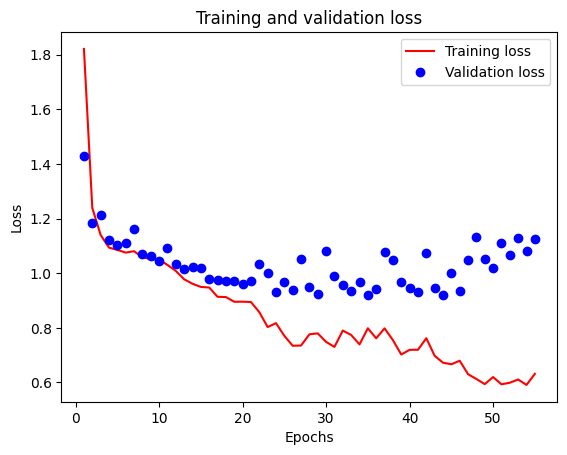

In [44]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "bo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

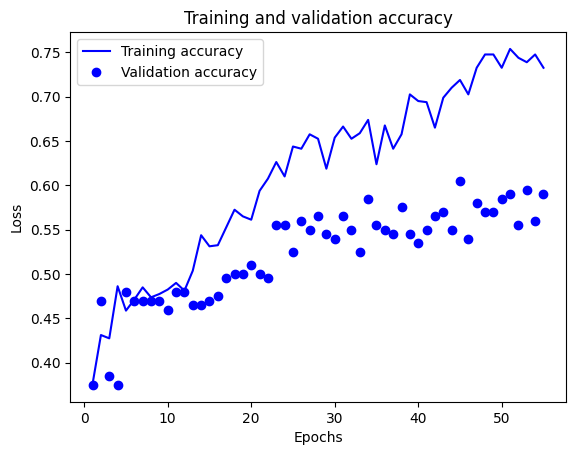

In [45]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training accuracy")
plt.plot(epochs, val_loss_values, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# predictions
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

# Confusion Matrix
print("** Confusion Matrix **")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

# Scores globaux
print("** Accuracy globale **:", accuracy_score(y_test, y_pred))
print("** Precision globale **:", precision_score(y_test, y_pred, average='macro'))
print("** Recall globale **:", recall_score(y_test, y_pred, average='macro'))

# Rapport détaillé par class
print("** Classification Report **")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1", "Class 2", "Class 3"]))

 7/30 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step